In [1]:
%matplotlib inline
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
# Import data files from Kaggle API
!kaggle competitions download -c ds3-predictive-modeling-challenge


  0%|          | 0.00/3.81M [00:00<?, ?B/s]
 26%|##6       | 1.00M/3.81M [00:00<00:02, 1.32MB/s]
 53%|#####2    | 2.00M/3.81M [00:00<00:01, 1.77MB/s]
100%|##########| 3.81M/3.81M [00:01<00:00, 2.39MB/s]

  0%|          | 0.00/211k [00:00<?, ?B/s]
100%|##########| 211k/211k [00:00<00:00, 27.0MB/s]

  0%|          | 0.00/948k [00:00<?, ?B/s]
100%|##########| 948k/948k [00:00<00:00, 11.7MB/s]

  0%|          | 0.00/236k [00:00<?, ?B/s]
100%|##########| 236k/236k [00:00<00:00, 17.3MB/s]


In [3]:
# Unzip data files
!unzip 'test_features.csv.zip'
!unzip 'train_features.csv.zip'
!unzip 'train_labels.csv.zip'

Archive:  test_features.csv.zip
  inflating: test_features.csv       
Archive:  train_features.csv.zip
  inflating: train_features.csv      
Archive:  train_labels.csv.zip
  inflating: train_labels.csv        


In [52]:
# Import data
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# assign to train, test, and submission
X_train = train_features.drop(columns='id')
X_test = test_features.drop(columns='id')
y_train = train_labels.drop(columns='id')
submission = test_features[['id']]

X_train.shape, X_test.shape, y_train.shape

((59400, 39), (14358, 39), (59400, 1))

### Kaggle submission function

In [71]:
def submission_csv(y_pred, file_name):
    y_pred = y_pred.copy()
    submission['status_group'] = y_pred
    submission.to_csv(file_name, index=False)

### Data Exploration

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


In [55]:
X_train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [56]:
X_train.describe(include='number')

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [57]:
X_train.describe(exclude='number').T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


In [58]:
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')
X_train_numeric.shape, X_test_numeric.shape

((59400, 9), (14358, 9))

In [59]:
X_train_numeric.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

### Majority class baseline

In [60]:
y_train['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### First, fast model using only numerical data

In [61]:
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning

# Ignore data conversion warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Create a pipeline
pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=42)
)

# Fit the model
pipe.fit(X_train_numeric, y_train)

# Make first predictions
y_pred = pipe.predict(X_test_numeric)

In [74]:
# Create submission csv file
submission_csv(y_pred, 'kaggle-submission-001.csv')

C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# submit predictions to kaggle
!kaggle competitions submit -c ds3-predictive-modeling-challenge -f kaggle-submission-001.csv -m "Initial baseline with only numeric features"

Successfully submitted to DS3 Predictive Modeling Challenge



  0%|          | 0.00/254k [00:00<?, ?B/s]
  3%|3         | 8.00k/254k [00:00<00:10, 25.0kB/s]
 31%|###1      | 80.0k/254k [00:00<00:05, 35.1kB/s]
 41%|####      | 104k/254k [00:00<00:03, 46.8kB/s] 
 50%|#####     | 128k/254k [00:00<00:02, 61.7kB/s]
100%|##########| 254k/254k [00:03<00:00, 76.3kB/s]


### Kitchen sink model

In [73]:
import category_encoders as ce

# Remove nan values and replace them with 'missing'
def clean_nan(X):
    X.copy()
    X = X.fillna('missing')
    return X

X_train = clean_nan(X_train)
X_test = clean_nan(X_test)

In [75]:
# Create pipeline
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=42)
)

# Fit the model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [77]:
# Create submission file
submission_csv(y_pred, 'kaggle-submission-002.csv')

C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
# submit predictions to kaggle
!kaggle competitions submit -c ds3-predictive-modeling-challenge -f kaggle-submission-002.csv -m "Kitchen sink model"

Successfully submitted to DS3 Predictive Modeling Challenge



  0%|          | 0.00/266k [00:00<?, ?B/s]
  3%|3         | 8.00k/266k [00:00<00:09, 28.6kB/s]
 33%|###3      | 88.0k/266k [00:00<00:04, 40.2kB/s]
 42%|####2     | 112k/266k [00:00<00:02, 53.6kB/s] 
 69%|######9   | 184k/266k [00:00<00:01, 74.2kB/s]
100%|##########| 266k/266k [00:02<00:00, 97.6kB/s]


### Kitchen sink model using hyper-parameter optimization

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Scale and encode data
encoder = ce.OrdinalEncoder()
scaler = StandardScaler()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Set parameters
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 5)
}

# Create randomized search
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=2,
    verbose=10,
    return_train_score=True,
    random_state=42
)

# fit the model
search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.5min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [88]:
# print best accuracy score
search.best_score_

0.7068518518518518

In [89]:
# make predictions
best = search.best_estimator_
y_pred = best.predict(X_test_scaled)

# create submission csv file
submission_csv(y_pred, 'kaggle-submission-004.csv')

C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
# submit predictions to kaggle
!kaggle competitions submit -c ds3-predictive-modeling-challenge -f kaggle-submission-004.csv -m "Kitchen sink model with hyper-parameter optimization version 2"

Successfully submitted to DS3 Predictive Modeling Challenge



  0%|          | 0.00/263k [00:00<?, ?B/s]
  3%|3         | 8.00k/263k [00:00<00:09, 28.9kB/s]
 36%|###6      | 96.0k/263k [00:00<00:04, 40.2kB/s]
 70%|######9   | 184k/263k [00:00<00:01, 56.3kB/s] 
100%|##########| 263k/263k [00:02<00:00, 101kB/s] 


### Visualize feature importances

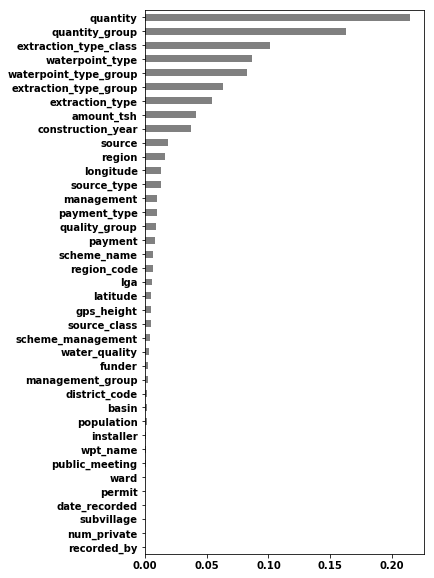

In [91]:
n = len(X_train.columns)
figsize = (5, 10)

importances = pd.Series(best.feature_importances_, X_train.columns)
top_n = importances.sort_values()[-n:]
plt.figure(figsize=figsize)
top_n.plot.barh(color='gray');

### Permutation importance

In [94]:
# import eli5
# from eli5.sklearn import PermutationImportance
# from sklearn.linear_model import RandomizedLogisticRegression

# permuter = PermutationImportance(best, scoring='accuracy', cv='prefit', n_iter=50, random_state=42)

# permuter.fit(X_test_scaled.values, y_pred)

### Trying out different models

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

models = [LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, multi_class='auto'),
         DecisionTreeClassifier(max_depth=3, random_state=42),
         DecisionTreeClassifier(max_depth=None, random_state=42),
         BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
         RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42),
         RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42),
         XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

Cross-Validation Accuracy: 0.6442088518023923 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

Cross-Validation Accuracy: 0.6908086237825615 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impur

In [99]:
len(X_train.columns)

39

In [100]:
# Set parameters
param_dist = {
    'n_estimators': randint(50, 300),
    'max_features': randint(3, 39),
    'criterion': ['gini', 'entropy']
}

# Create randomized search
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=None),
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=2,
    verbose=10,
    return_train_score=True,
    random_state=42
)

# fit the model
search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.2min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [101]:
search.best_score_

0.8027104377104377

In [102]:
best = search.best_estimator_
y_pred = best.predict(X_test_scaled)

# create submission csv file
submission_csv(y_pred, 'kaggle-submission-005.csv')

C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
# submit predictions to kaggle
!kaggle competitions submit -c ds3-predictive-modeling-challenge -f kaggle-submission-005.csv -m "Kitchen sink model with hyper-parameter optimization version 3"

Successfully submitted to DS3 Predictive Modeling Challenge



  0%|          | 0.00/278k [00:00<?, ?B/s]
  3%|2         | 8.00k/278k [00:00<00:10, 26.5kB/s]
 32%|###1      | 88.0k/278k [00:00<00:05, 37.3kB/s]
 40%|####      | 112k/278k [00:00<00:03, 49.8kB/s] 
 63%|######3   | 176k/278k [00:00<00:01, 68.8kB/s]
100%|##########| 278k/278k [00:02<00:00, 107kB/s] 


### Categorical feature cleaning

In [112]:
X_train.describe(exclude='number').T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,59400,1898,Government Of Tanzania,9084
installer,59400,2146,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59400,19288,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,59400,3,True,51011


In [113]:
X_train['date_recorded'].head()

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object

In [114]:
X_train['date_recorded'].describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

In [ ]:
def wrangle(X):
    X = X.copy()
    
    # Convert dates to datetime format
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Use dates to create new features
    X['date_recorded_year'] = X['date_recorded'].dt.year
    X['age'] = 2019 - X['construction_year']
    X['age_when_recorded'] = X['date_recorded'].dt.year - X['construction_year']
    
    
    return X